In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta
%matplotlib inline 

In [507]:
events = pd.read_csv('events_2018-07-03-02.05.42.csv')[['timestamp','event']]
rec = pd.read_csv('recording_2018-07-03-06.05.14.csv')[['timestamps','Right AUX']]
events['timestamp'] = pd.to_datetime(events['timestamp'],unit='s')
rec['timestamps'] = pd.to_datetime(rec['timestamps'],unit='s')

In [508]:
events

timestamp         event
0  2018-07-03 06:04:44.777309000         start
1  2018-07-03 06:05:17.131401999  high voltage
2  2018-07-03 06:05:19.631785000   low voltage
3  2018-07-03 06:05:22.132146000  high voltage
4  2018-07-03 06:05:24.633006000   low voltage
5  2018-07-03 06:05:27.133359000  high voltage
6  2018-07-03 06:05:29.634220000   low voltage
7  2018-07-03 06:05:32.134555000  high voltage
8  2018-07-03 06:05:34.635401000   low voltage
9  2018-07-03 06:05:37.136249000  high voltage
10 2018-07-03 06:05:39.638096000   low voltage

In [509]:
events['timestamp'][2] - events['timestamp'][1]

Timedelta('0 days 00:00:02.500383')

Increments of 2500ms

In [510]:
# Go to last time and add a little buffer.
firstStamp =  rec.iloc[0]['timestamps']
firstStamp

Timestamp('2018-07-03 06:05:20.381000')

In [511]:
lastStamp = events.iloc[-1]['timestamp'] + timedelta(milliseconds=4000)
lastStamp

Timestamp('2018-07-03 06:05:43.638096')

In [512]:
events = events[(events['timestamp'] >= firstStamp) & (events['timestamp'] <= lastStamp)]
rec = rec[(rec['timestamps'] >= firstStamp) & (rec['timestamps'] <= lastStamp)]

In [513]:
events

timestamp         event
3  2018-07-03 06:05:22.132146  high voltage
4  2018-07-03 06:05:24.633006   low voltage
5  2018-07-03 06:05:27.133359  high voltage
6  2018-07-03 06:05:29.634220   low voltage
7  2018-07-03 06:05:32.134555  high voltage
8  2018-07-03 06:05:34.635401   low voltage
9  2018-07-03 06:05:37.136249  high voltage
10 2018-07-03 06:05:39.638096   low voltage

### Note:
* Low voltage (no sound) = highly noisy Right AUX.
* High voltage (loud sound), results in normal looking EEG signal. 

In [514]:
rec.head()

timestamps  Right AUX
0 2018-07-03 06:05:20.381   -619.629
1 2018-07-03 06:05:20.385    -45.898
2 2018-07-03 06:05:20.389    722.656
3 2018-07-03 06:05:20.393    316.406
4 2018-07-03 06:05:20.396   -293.945

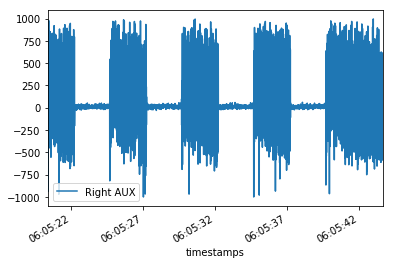

In [515]:
rec.plot(x='timestamps', y='Right AUX')

Note: high difference between holding line voltage low and high.
In the following analysis we will be looking for the transition between high voltage (low / normal EEG value) to low voltage (noisy, giant EEG values).

In [516]:
bufferedStartTime = events['timestamp'][7] + timedelta(milliseconds=175)
eventActualEndTime = events['timestamp'][8]
bufferedEndTime = events['timestamp'][9] + timedelta(milliseconds=175)

In [517]:
# Get the events from a little after the state change until the actual end time. These are our sample that we know should
# represent either voltage high or low. 
samples = rec[(rec['timestamps'] >= bufferedStartTime) & (rec['timestamps'] <= eventActualEndTime)]
samples

timestamps  Right AUX
3055 2018-07-03 06:05:32.313     15.625
3056 2018-07-03 06:05:32.317     23.926
3057 2018-07-03 06:05:32.321     13.672
3058 2018-07-03 06:05:32.325     12.695
3059 2018-07-03 06:05:32.329     17.578
3060 2018-07-03 06:05:32.333     11.719
3061 2018-07-03 06:05:32.337     -5.859
3062 2018-07-03 06:05:32.340     14.648
3063 2018-07-03 06:05:32.344     10.254
3064 2018-07-03 06:05:32.348     -3.906
3065 2018-07-03 06:05:32.352     14.648
3066 2018-07-03 06:05:32.356     10.254
3067 2018-07-03 06:05:32.360     23.926
3068 2018-07-03 06:05:32.364     16.602
3069 2018-07-03 06:05:32.368    -21.973
3070 2018-07-03 06:05:32.372      8.301
3071 2018-07-03 06:05:32.376     26.855
3072 2018-07-03 06:05:32.379      0.000
3073 2018-07-03 06:05:32.383      8.301
3074 2018-07-03 06:05:32.387     18.066
3075 2018-07-03 06:05:32.391     10.742
3076 2018-07-03 06:05:32.395     21.973
3077 2018-07-03 06:05:32.399     33.691
3078 2018-07-03 06:05:32.403     18.066
3079 2018-07-03 06:05:32.407     17.090
3080 2018-07-03 06:05:32.411     -0.977
3081 2018-07-03 06:05:32.415      7.324
3082 2018-07-03 06:05:32.419      6.348
3083 2018-07-03 06:05:32.422     -0.977
3084 2018-07-03 06:05:32.426     17.578
...                      ...        ...
3620 2018-07-03 06:05:34.520     13.672
3621 2018-07-03 06:05:34.524     20.020
3622 2018-07-03 06:05:34.528      8.789
3623 2018-07-03 06:05:34.532      7.812
3624 2018-07-03 06:05:34.536     -9.277
3625 2018-07-03 06:05:34.539      4.395
3626 2018-07-03 06:05:34.543     14.648
3627 2018-07-03 06:05:34.547     13.184
3628 2018-07-03 06:05:34.551     19.043
3629 2018-07-03 06:05:34.555     10.254
3630 2018-07-03 06:05:34.559     18.066
3631 2018-07-03 06:05:34.563     19.531
3632 2018-07-03 06:05:34.567     14.648
3633 2018-07-03 06:05:34.571     14.160
3634 2018-07-03 06:05:34.575     18.066
3635 2018-07-03 06:05:34.578     22.949
3636 2018-07-03 06:05:34.582     21.484
3637 2018-07-03 06:05:34.586      5.859
3638 2018-07-03 06:05:34.590      1.465
3639 2018-07-03 06:05:34.594     18.555
3640 2018-07-03 06:05:34.598     13.672
3641 2018-07-03 06:05:34.602      5.859
3642 2018-07-03 06:05:34.606     27.832
3643 2018-07-03 06:05:34.610     53.223
3644 2018-07-03 06:05:34.614     25.879
3645 2018-07-03 06:05:34.618     15.625
3646 2018-07-03 06:05:34.621      8.301
3647 2018-07-03 06:05:34.625     12.207
3648 2018-07-03 06:05:34.629     18.066
3649 2018-07-03 06:05:34.633     15.137

[595 rows x 2 columns]

In [518]:
mean = samples['Right AUX'].mean()
std = samples['Right AUX'].std()
mean, std

(12.893905882352941, 11.088316006187757)

In [519]:
# Get the samples from between the actual event end time and a little after - this is where we will find our actual transition event.
endValues = rec[(rec['timestamps'] > eventActualEndTime) & (rec['timestamps'] <= bufferedEndTime)]
endValues

timestamps  Right AUX
3650 2018-07-03 06:05:34.637      7.812
3651 2018-07-03 06:05:34.641      0.488
3652 2018-07-03 06:05:34.645     11.719
3653 2018-07-03 06:05:34.649     25.879
3654 2018-07-03 06:05:34.653     28.320
3655 2018-07-03 06:05:34.657      7.812
3656 2018-07-03 06:05:34.660    -12.695
3657 2018-07-03 06:05:34.664     12.695
3658 2018-07-03 06:05:34.668     15.137
3659 2018-07-03 06:05:34.672      8.301
3660 2018-07-03 06:05:34.676     -9.766
3661 2018-07-03 06:05:34.680     16.113
3662 2018-07-03 06:05:34.684      5.859
3663 2018-07-03 06:05:34.688   -689.941
3664 2018-07-03 06:05:34.692  -1000.000
3665 2018-07-03 06:05:34.696   -315.430
3666 2018-07-03 06:05:34.700    636.230
3667 2018-07-03 06:05:34.703    375.000
3668 2018-07-03 06:05:34.707   -573.242
3669 2018-07-03 06:05:34.711   -796.875
3670 2018-07-03 06:05:34.715    -68.848
3671 2018-07-03 06:05:34.719   -139.648
3672 2018-07-03 06:05:34.723   -572.266
3673 2018-07-03 06:05:34.727     32.715
3674 2018-07-03 06:05:34.731    214.355
3675 2018-07-03 06:05:34.735   -279.297
3676 2018-07-03 06:05:34.739   -383.301
3677 2018-07-03 06:05:34.743    391.602
3678 2018-07-03 06:05:34.746    899.902
3679 2018-07-03 06:05:34.750     74.707
...                      ...        ...
4305 2018-07-03 06:05:37.195    -24.414
4306 2018-07-03 06:05:37.199   -486.328
4307 2018-07-03 06:05:37.203    124.512
4308 2018-07-03 06:05:37.207   -132.324
4309 2018-07-03 06:05:37.211   -297.363
4310 2018-07-03 06:05:37.215    452.637
4311 2018-07-03 06:05:37.219    401.855
4312 2018-07-03 06:05:37.223   -397.461
4313 2018-07-03 06:05:37.227    223.145
4314 2018-07-03 06:05:37.231    624.023
4315 2018-07-03 06:05:37.234    653.320
4316 2018-07-03 06:05:37.238    255.371
4317 2018-07-03 06:05:37.242   -109.863
4318 2018-07-03 06:05:37.246     54.688
4319 2018-07-03 06:05:37.250      4.883
4320 2018-07-03 06:05:37.254    -21.973
4321 2018-07-03 06:05:37.258    -15.137
4322 2018-07-03 06:05:37.262     23.926
4323 2018-07-03 06:05:37.266      9.277
4324 2018-07-03 06:05:37.270     12.695
4325 2018-07-03 06:05:37.273     28.320
4326 2018-07-03 06:05:37.277     30.273
4327 2018-07-03 06:05:37.281     19.043
4328 2018-07-03 06:05:37.285     10.742
4329 2018-07-03 06:05:37.289     10.254
4330 2018-07-03 06:05:37.293     10.742
4331 2018-07-03 06:05:37.297      1.465
4332 2018-07-03 06:05:37.301     11.230
4333 2018-07-03 06:05:37.305     18.066
4334 2018-07-03 06:05:37.309     24.902

[685 rows x 2 columns]

In [520]:
outliers = endValues[(np.abs(endValues['Right AUX'] - mean) > (3 * np.abs(std)))]
outliers

timestamps  Right AUX
3663 2018-07-03 06:05:34.688   -689.941
3664 2018-07-03 06:05:34.692  -1000.000
3665 2018-07-03 06:05:34.696   -315.430
3666 2018-07-03 06:05:34.700    636.230
3667 2018-07-03 06:05:34.703    375.000
3668 2018-07-03 06:05:34.707   -573.242
3669 2018-07-03 06:05:34.711   -796.875
3670 2018-07-03 06:05:34.715    -68.848
3671 2018-07-03 06:05:34.719   -139.648
3672 2018-07-03 06:05:34.723   -572.266
3674 2018-07-03 06:05:34.731    214.355
3675 2018-07-03 06:05:34.735   -279.297
3676 2018-07-03 06:05:34.739   -383.301
3677 2018-07-03 06:05:34.743    391.602
3678 2018-07-03 06:05:34.746    899.902
3679 2018-07-03 06:05:34.750     74.707
3680 2018-07-03 06:05:34.754   -259.766
3681 2018-07-03 06:05:34.758    179.199
3682 2018-07-03 06:05:34.762    121.582
3683 2018-07-03 06:05:34.766    -56.641
3685 2018-07-03 06:05:34.774    198.730
3686 2018-07-03 06:05:34.778    125.000
3688 2018-07-03 06:05:34.785    352.051
3689 2018-07-03 06:05:34.789    772.461
3690 2018-07-03 06:05:34.793    571.777
3691 2018-07-03 06:05:34.797     65.918
3692 2018-07-03 06:05:34.801    107.910
3693 2018-07-03 06:05:34.805    741.699
3694 2018-07-03 06:05:34.809    214.844
3695 2018-07-03 06:05:34.813   -165.039
...                      ...        ...
4289 2018-07-03 06:05:37.133    672.852
4290 2018-07-03 06:05:37.137    387.695
4291 2018-07-03 06:05:37.141   -254.883
4292 2018-07-03 06:05:37.145    584.473
4293 2018-07-03 06:05:37.149    502.441
4294 2018-07-03 06:05:37.152   -319.824
4295 2018-07-03 06:05:37.156     59.082
4296 2018-07-03 06:05:37.160    200.195
4297 2018-07-03 06:05:37.164    231.445
4298 2018-07-03 06:05:37.168   -173.340
4299 2018-07-03 06:05:37.172   -389.160
4300 2018-07-03 06:05:37.176     74.219
4301 2018-07-03 06:05:37.180    536.133
4303 2018-07-03 06:05:37.188    -69.336
4304 2018-07-03 06:05:37.191    810.059
4305 2018-07-03 06:05:37.195    -24.414
4306 2018-07-03 06:05:37.199   -486.328
4307 2018-07-03 06:05:37.203    124.512
4308 2018-07-03 06:05:37.207   -132.324
4309 2018-07-03 06:05:37.211   -297.363
4310 2018-07-03 06:05:37.215    452.637
4311 2018-07-03 06:05:37.219    401.855
4312 2018-07-03 06:05:37.223   -397.461
4313 2018-07-03 06:05:37.227    223.145
4314 2018-07-03 06:05:37.231    624.023
4315 2018-07-03 06:05:37.234    653.320
4316 2018-07-03 06:05:37.238    255.371
4317 2018-07-03 06:05:37.242   -109.863
4318 2018-07-03 06:05:37.246     54.688
4320 2018-07-03 06:05:37.254    -21.973

[625 rows x 2 columns]

In [521]:
firstOutlier = outliers.iloc[0]
firstOutlier

timestamps    2018-07-03 06:05:34.688000
Right AUX                       -689.941
Name: 3663, dtype: object

In [522]:
firstOutlier['timestamps'] - eventActualEndTime

Timedelta('0 days 00:00:00.052599')